In [ ]:
!unzip '/content/drive/MyDrive/deepLearning/data/horse-or-human.zip' -d 'data'

In [ ]:
from glob import glob

In [ ]:
horses_fileList = glob("data/horses/*.png")
humans_fileList = glob("data/humans/*.png")

In [ ]:
len(humans_fileList), len(horses_fileList)

(527, 500)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

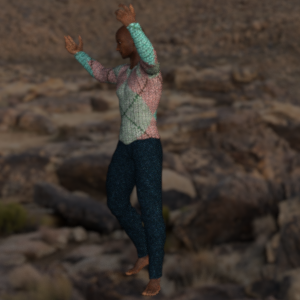

In [ ]:
Image.open(humans_fileList[0])

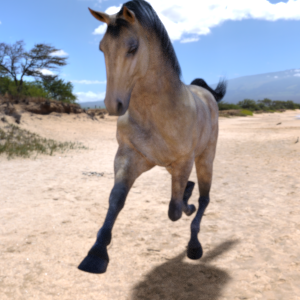

In [ ]:
Image.open(horses_fileList[0])

In [ ]:
from tensorflow import keras
# 전체 이미지를 1/255로 스케일 한다
generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
train_generator =  generator.flow_from_directory(
    'data',
    target_size = (300,300),  # 이미지의 가로세로를 300 300으로 변경
    class_mode='binary',
    subset='training'
)

Found 822 images belonging to 2 classes.


In [ ]:
val_generator =  generator.flow_from_directory(
    'data',
    target_size = (300,300),  # 이미지의 가로세로를 300 300으로 변경
    class_mode='binary',
    subset='validation'
)

Found 205 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
#첫번째 배치의 이미지와 레이블을 가져온다
images,labels =  next(train_generator)

In [ ]:
images.shape, labels

((32, 300, 300, 3),
 array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       dtype=float32))

In [ ]:
# 모델 생성
# C-P C-P C-P C-P C-P - F - D - D

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64,kernel_size=3, activation='relu',input_shape = (300,300,3) ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(64,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(32,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(16,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(8,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy,metrics='accuracy')

In [ ]:
model.fit(train_generator, epochs=15,validation_data=val_generator)

In [ ]:
model.save('/content/drive/MyDrive/deepLearning/data/human.h5')

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/deepLearning/data/human.h5')

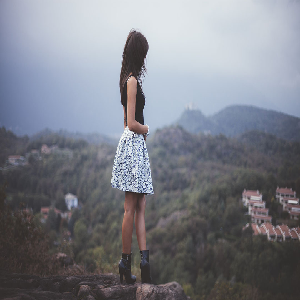

In [ ]:
img = keras.utils.load_img('/content/drive/MyDrive/deepLearning/data/hh_image_1.jpg', target_size=(300,300))
img

In [ ]:
x = keras.utils.img_to_array(img)
x.shape

(300, 300, 3)

In [ ]:
import numpy as np
np.expand_dims(x,axis=0).shape, x.shape

((1, 300, 300, 3), (300, 300, 3))

In [ ]:
x_expend = np.expand_dims(x,axis=0)
x_expend.shape

(1, 300, 300, 3)

In [ ]:
model.predict(x_expend)

1/1 [==============================] - 8s 8s/step


array([[1.]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# 예측함수
def detect_image(filepath):
  plt.imshow(mpimg.imread(filepath))
  plt.axis('off')
  plt.show()
  # 이미지 불러오기
  img = keras.utils.load_img(filepath, target_size=(300,300))
  # 이미지를 수치데이터로 변경하기
  x = keras.utils.img_to_array(img)
  # (1,300,300,3) 형식으로 차수 추가하기(모델적용을 위해서)
  x = np.expand_dims(x,axis=0)
  pred = model.predict(x)
  if pred[0][0] > 0.5:
    print("사람")
  else:
    print("말")


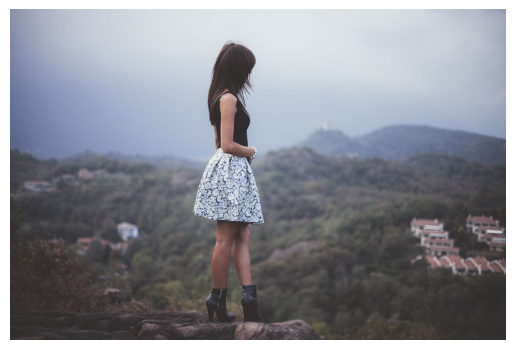

1/1 [==============================] - 0s 34ms/step
사람


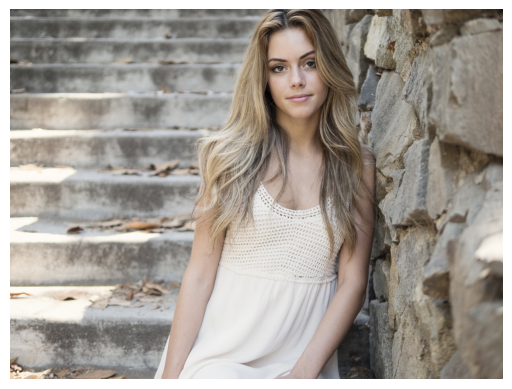

1/1 [==============================] - 0s 37ms/step
말


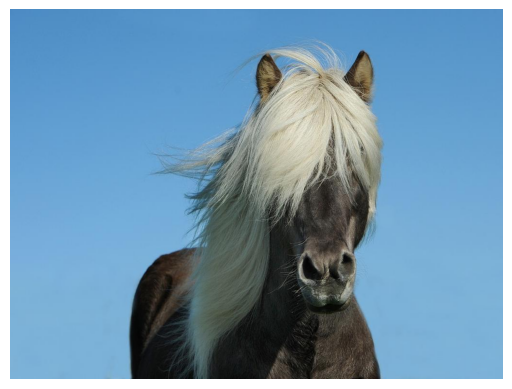

1/1 [==============================] - 0s 40ms/step
말


In [ ]:
from glob import glob
files = glob('/content/drive/MyDrive/deepLearning/data/*.jpg')
for file in files:
  detect_image(file)

이미지 증폭
  - ImageGenerator

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64,kernel_size=3, activation='relu',input_shape = (300,300,3) ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(64,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(32,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(16,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(8,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
# keras.optimizers.Adam()
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy,metrics='accuracy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip '/content/drive/MyDrive/deepLearning/data/horse-or-human.zip' -d 'data'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator =  train_datagen.flow_from_directory(
    'data',
    target_size = (300,300),  # 이미지의 가로세로를 300 300으로 변경
    class_mode='binary',
)

Found 1027 images belonging to 2 classes.
